<a href="https://colab.research.google.com/github/DivyaSankari/infoaidtech_/blob/main/Task3_Credit_Card_fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)

In [3]:
data1 = pd.read_csv('/content/creditcard.csv')
data1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,11926,0.224210,0.730182,0.536568,-0.297833,0.529837,0.008517,-0.153646,-0.778260,1.143360,...,0.311157,-1.489044,-0.207238,-0.991151,0.504758,0.005972,0.092759,0.213102,1.99,0.0
8762,11928,-0.777982,1.247878,1.106014,1.421211,-0.087339,0.044765,0.039896,0.547840,0.752861,...,-0.144915,-0.084414,-0.150048,-0.063168,-0.039265,-0.283939,0.250660,0.110168,12.99,0.0
8763,11930,1.297487,-0.202241,0.043946,0.094497,-0.057158,0.099204,-0.280711,-0.127515,2.168290,...,-0.338119,-0.551489,-0.248950,-0.964184,0.592470,1.156197,-0.102371,-0.014854,39.98,0.0
8764,11932,-1.093189,0.157400,2.048652,-0.860421,0.235073,-0.167494,0.636240,-0.205278,1.507648,...,-0.255789,-0.233994,-0.451409,0.018927,0.377757,0.958870,-0.297683,-0.246392,80.50,0.0


In [4]:
data1.info


<bound method DataFrame.info of        Time        V1        V2        V3        V4        V5        V6  \
0         0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1         0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2         1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3         1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4         2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
...     ...       ...       ...       ...       ...       ...       ...   
8761  11926  0.224210  0.730182  0.536568 -0.297833  0.529837  0.008517   
8762  11928 -0.777982  1.247878  1.106014  1.421211 -0.087339  0.044765   
8763  11930  1.297487 -0.202241  0.043946  0.094497 -0.057158  0.099204   
8764  11932 -1.093189  0.157400  2.048652 -0.860421  0.235073 -0.167494   
8765  11932 -2.594443 -0.991587  1.957468  1.705635 -0.182961  0.095771   

            V7        V8        V9  ...       V21       V22       V

In [5]:
data1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,...,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8765.000000,8765.000000
mean,4894.080424,-0.262707,0.276243,0.903769,0.217214,-0.034510,0.128270,-0.046677,-0.072294,0.728188,...,-0.055446,-0.158052,-0.037962,0.025195,0.089314,0.074311,0.011304,0.002271,63.788774,0.003423
std,3659.865012,1.521932,1.316532,1.101483,1.436364,1.205127,1.326243,1.083787,1.289670,1.159165,...,0.928883,0.641624,0.490750,0.597736,0.429696,0.548979,0.407724,0.275457,189.989538,0.058407
min,0.000000,-27.670569,-34.607649,-12.389545,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.272790,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,1711.500000,-1.028743,-0.217634,0.398443,-0.660507,-0.640217,-0.652708,-0.522498,-0.198339,-0.020013,...,-0.268549,-0.556611,-0.180358,-0.338479,-0.158342,-0.341189,-0.080466,-0.016702,5.000000,0.000000
50%,3765.000000,-0.394821,0.306407,0.936989,0.206569,-0.131425,-0.170421,-0.021202,0.006406,0.697720,...,-0.126627,-0.149331,-0.049011,0.085047,0.123624,0.025788,-0.000373,0.017039,15.950000,0.000000
75%,7991.000000,1.144834,0.914845,1.593165,1.106434,0.384167,0.504494,0.503021,0.280994,1.436676,...,0.038298,0.245290,0.081211,0.419062,0.360417,0.400858,0.132495,0.078694,52.500000,0.000000
max,11932.000000,1.960497,8.261750,4.101716,10.463020,34.099309,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [6]:
data1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [7]:
data1.Class.value_counts()

0.0    8735
1.0      30
Name: Class, dtype: int64

In [8]:
data1.dropna(inplace=True)

In [9]:
x=data1.drop('Class',axis=1)
y=data1['Class']

In [10]:
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

Data Visualization for finding outliers

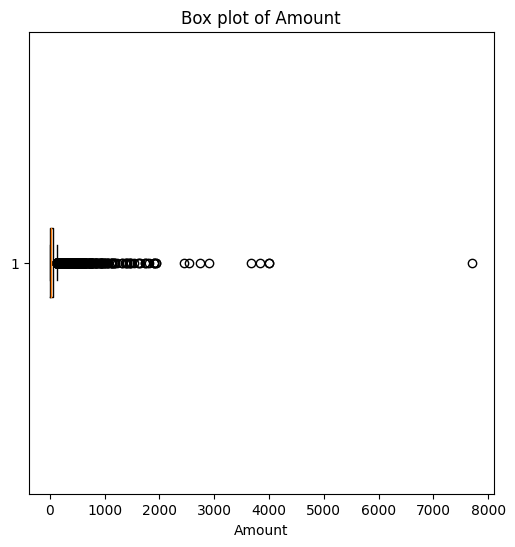

In [11]:
amt_column = data1['Amount']
plt.figure(figsize=(6,6))
plt.boxplot(amt_column,vert=False)
plt.title('Box plot of Amount')
plt.xlabel('Amount')
plt.show()

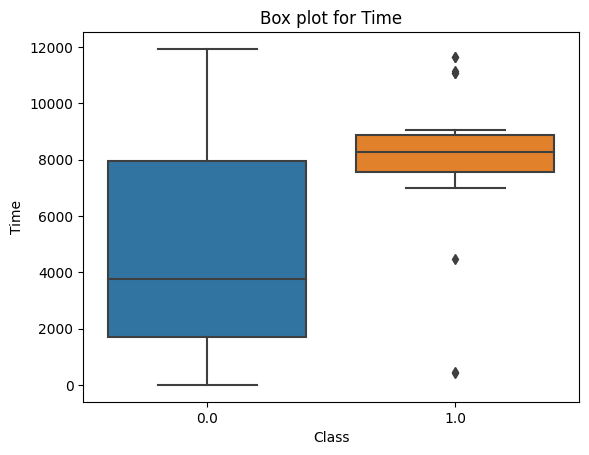

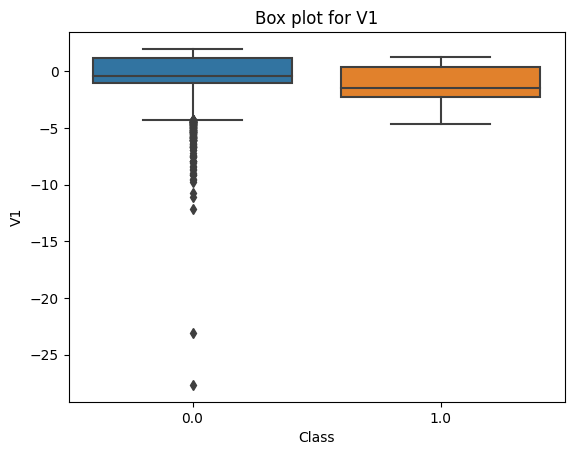

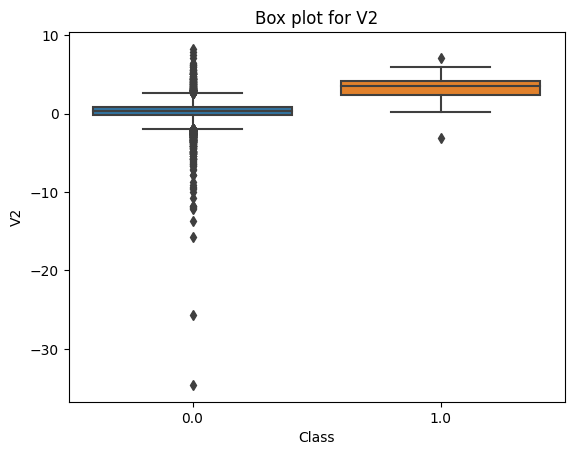

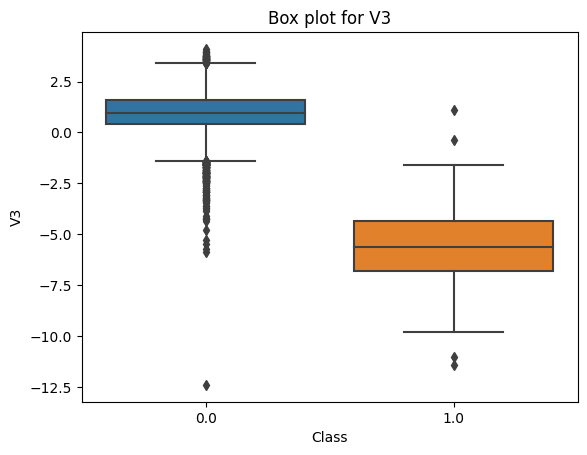

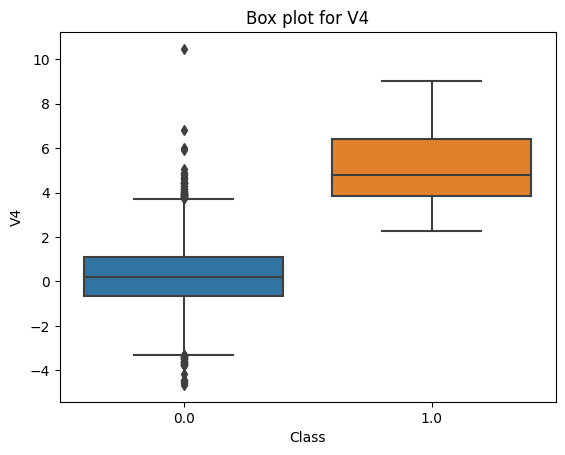

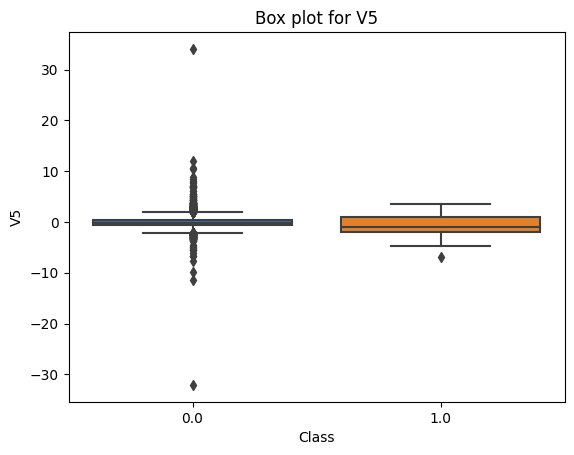

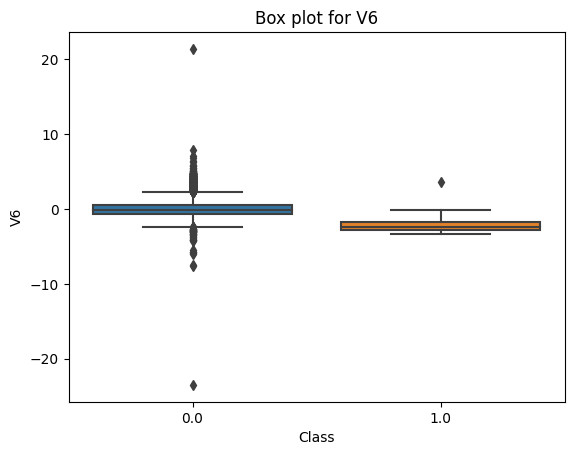

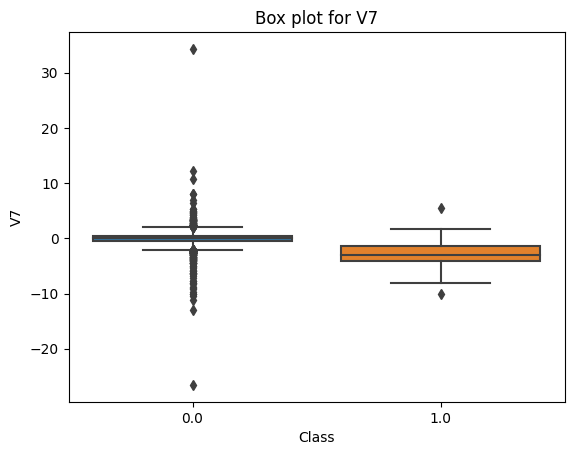

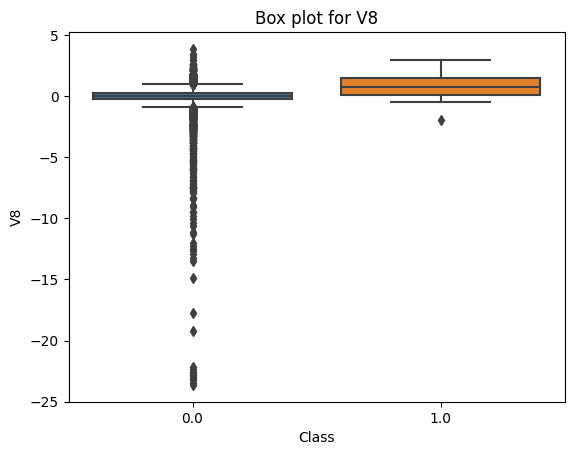

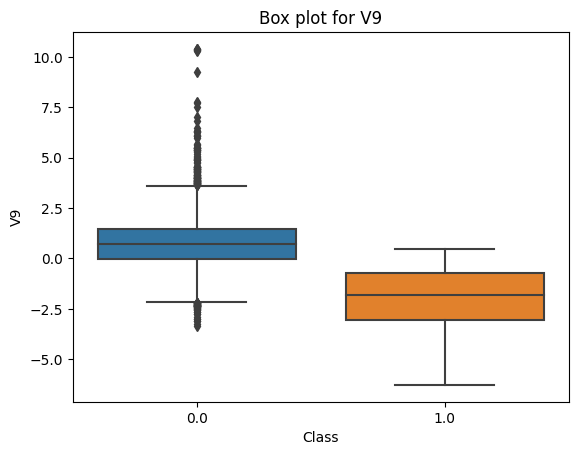

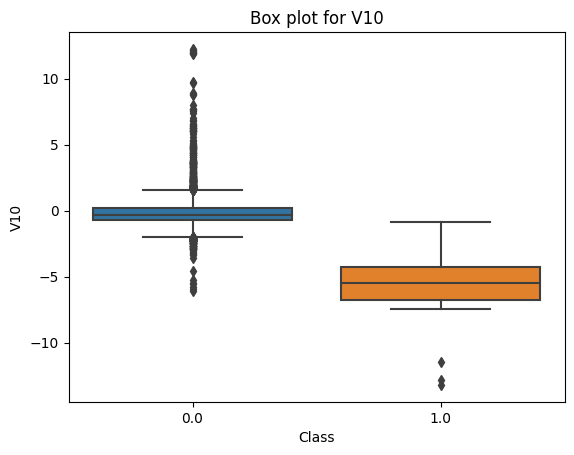

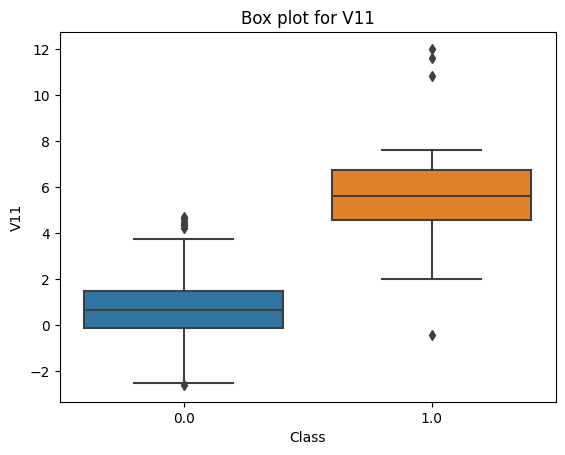

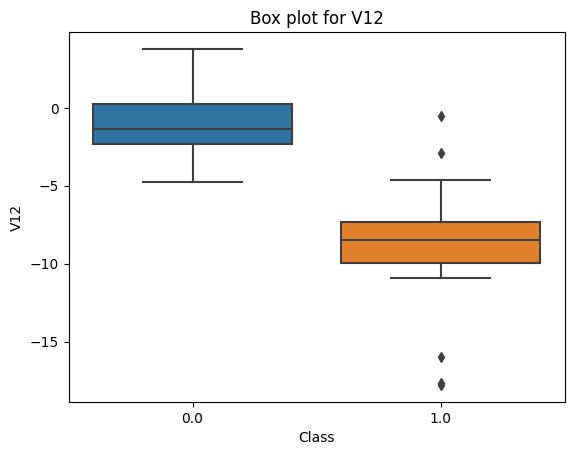

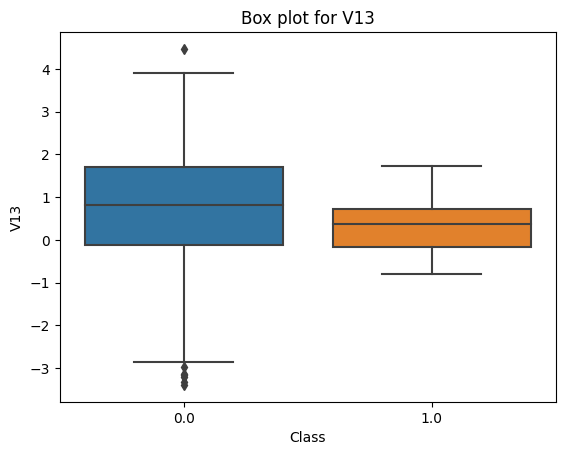

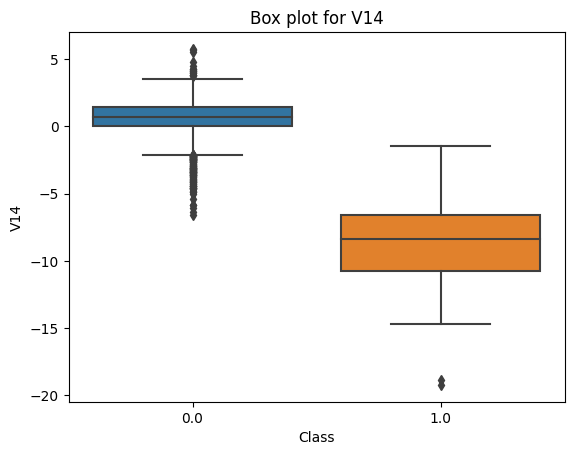

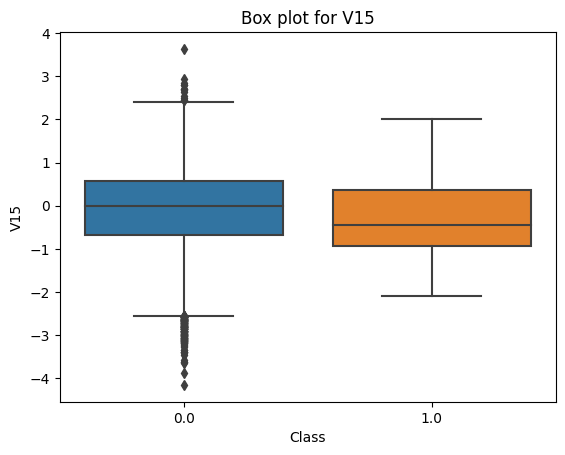

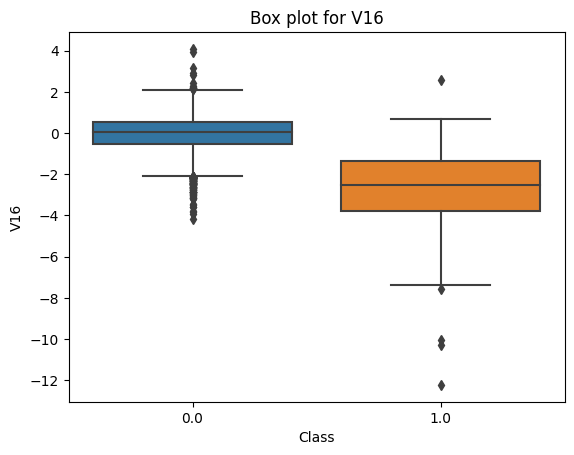

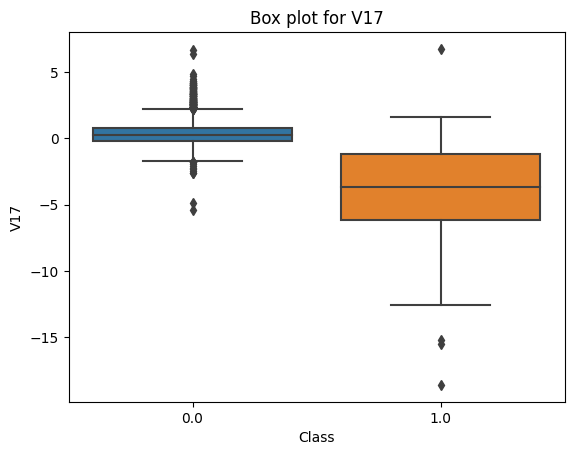

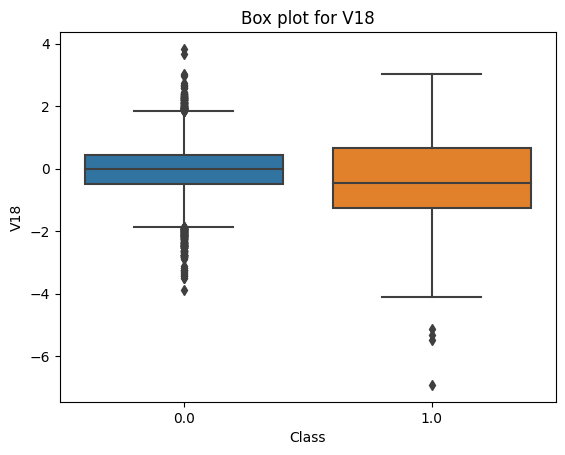

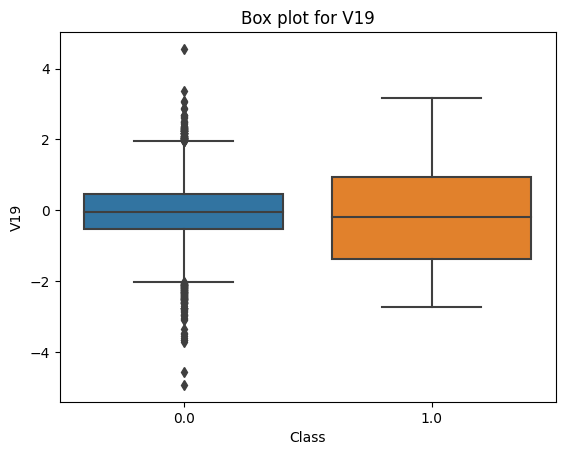

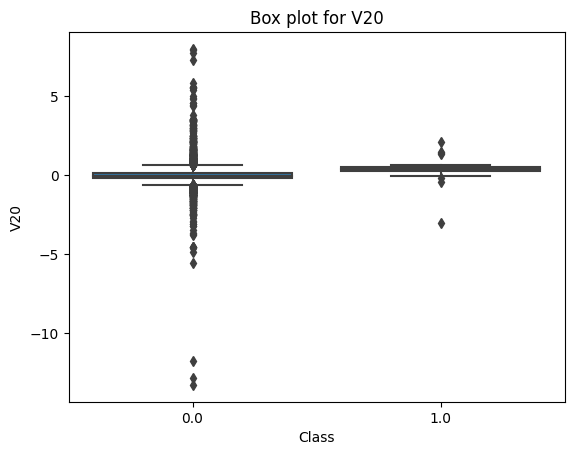

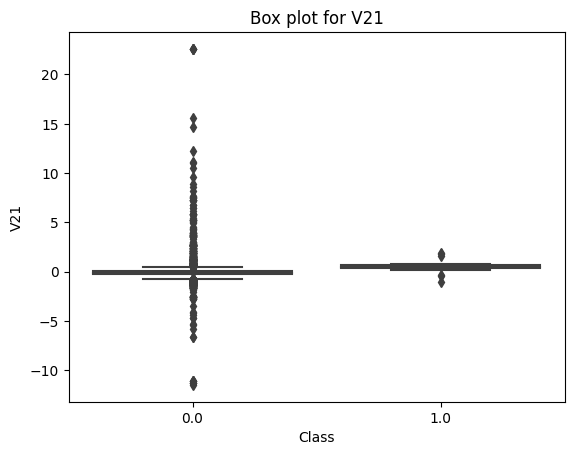

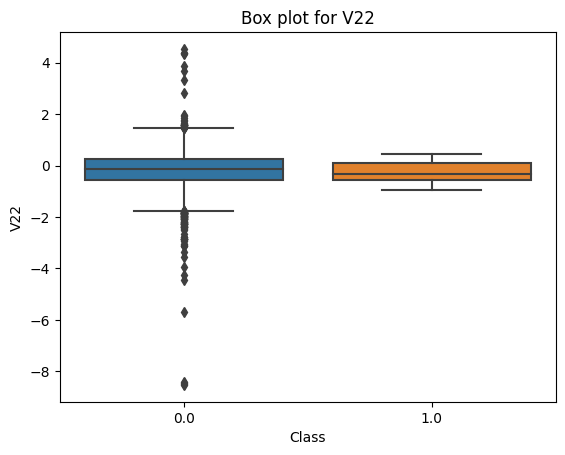

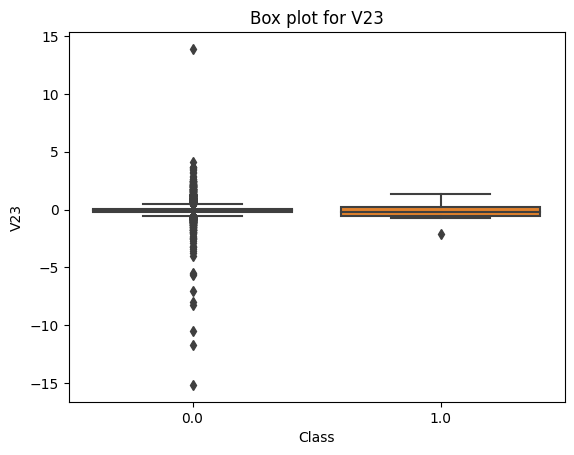

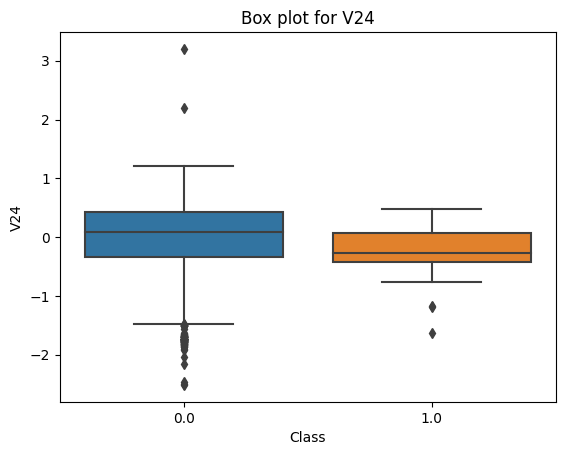

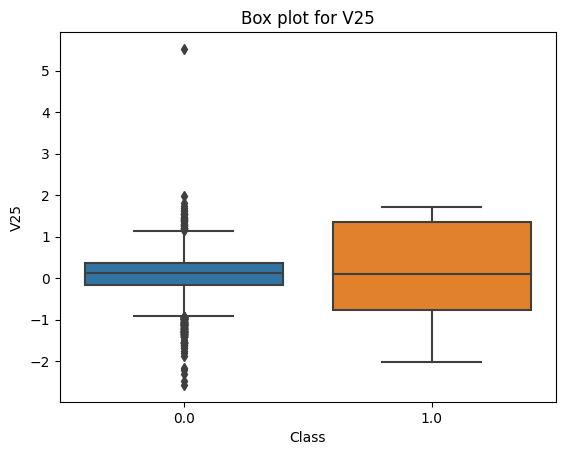

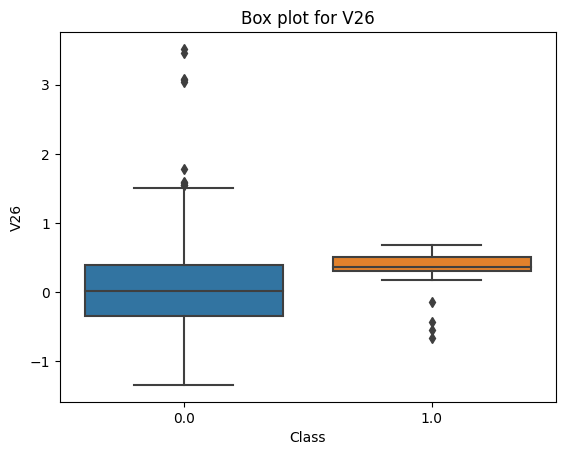

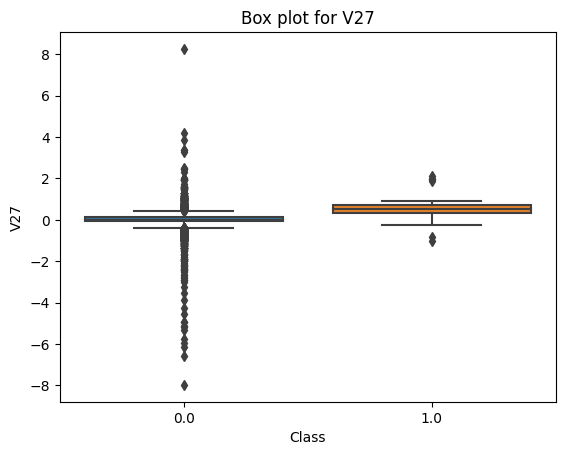

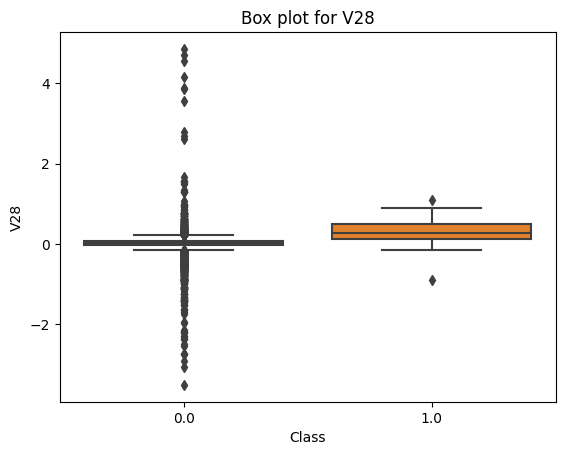

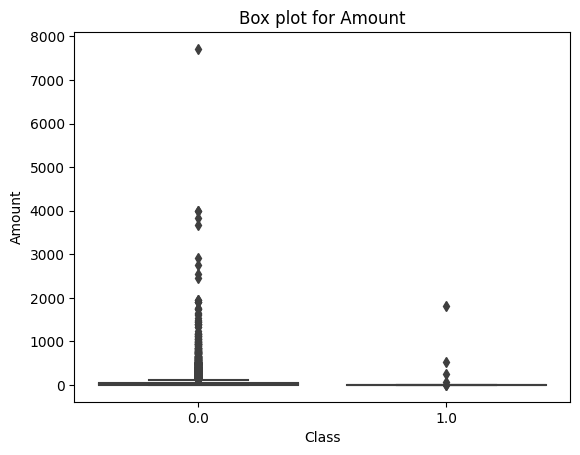

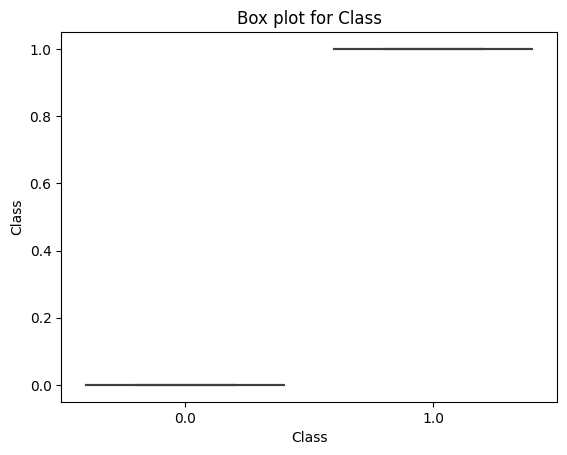

In [12]:
for j in data1.columns:
  sns.boxplot(x='Class',y=j,data=data1)
  plt.title(f"Box plot for {j}")
  plt.show()

correlation Matrix


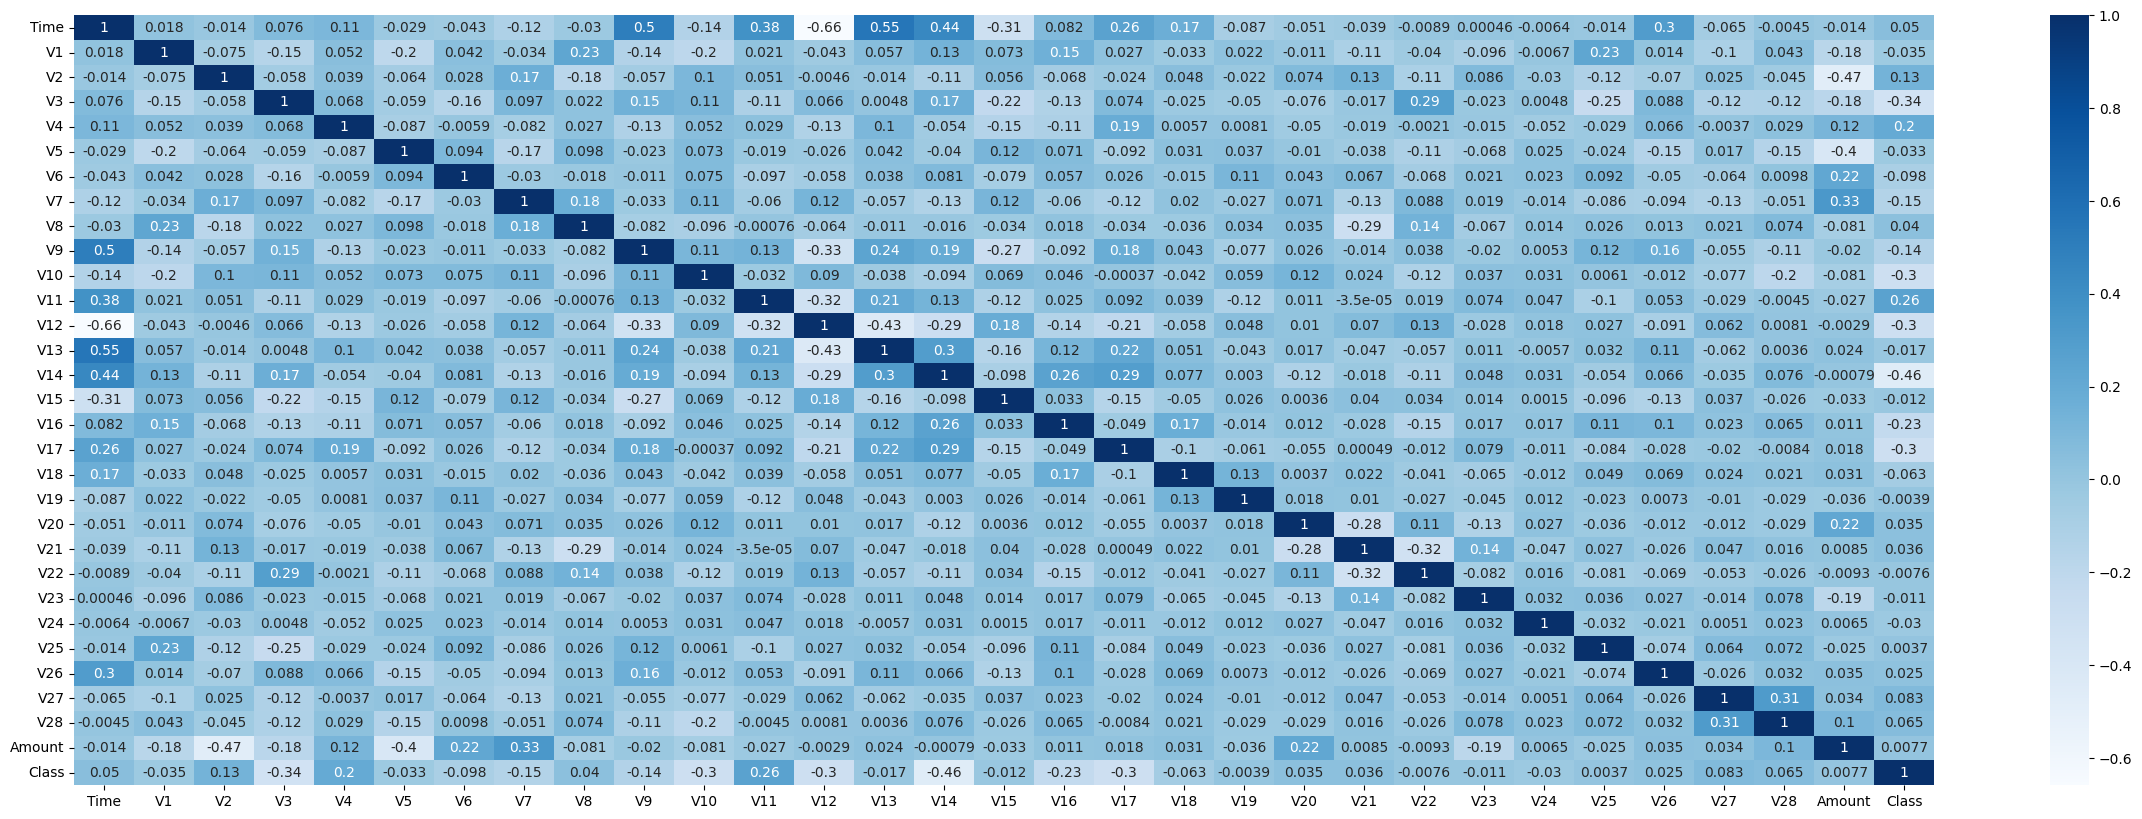

In [13]:
plt.figure(figsize = (30,10))
sns.heatmap(data1.corr(), annot = True, cmap="Blues")
plt.show()

In [14]:
#splitting of data as training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [18]:

y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

confusion = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{confusion}")

Accuracy: 0.9988590986879635
Precision: 1.0
Recall: 0.7142857142857143
F1 Score: 0.8333333333333333
Confusion Matrix:
[[1746    0]
 [   2    5]]


In [23]:
n=[[0.1,3.4,2.4,1,2,3,4,1,7,0.4,5.6,2.6,2.7,1.2,2.3,3.4,4.5,5.4,2.3,4,2,2.3,1.4,1.5,1.6,2.2,2.5,0.9,4.5,5.5]]

In [25]:
dd =Scaler.transform(n)

In [28]:

prediction = model.predict(dd)
if prediction[0] == 0:
    print("Non-Fraudulent Transaction")
else:
    print("Fraudulent Transaction")

Non-Fraudulent Transaction
